# Loading Data Sets

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
loan_data_path = 'loan.csv'
loan_data = pd.read_csv(loan_data_path, dtype={47: str})
#loan_data = pd.read_csv(loan_data_path)

In [34]:
data_dict_path = 'Data_Dictionary.xlsx'
data_dict = pd.read_excel(data_dict_path)

In [35]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [36]:
data_dict

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
112,verification_status,"Indicates if income was verified by LC, not ve..."
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...
114,zip_code,The first 3 numbers of the zip code provided b...
115,NaN,NaN


# Data Cleaning Steps

1.)Analyze and Resolve Data Type Issues:-For column 47 that has mixed data types
2.)Handle Missing Values:-Identify columns with a significant number of missing values and decide on an approach (remove, impute, etc.).
3.)Remove Unnecessary Columns:-Columns that do not contribute to the analysis or have excessive missing values might need to be dropped.
4.)Convert Data Types:-Convert columns like int_rate from string to numeric and standardize date formats if necessary.

In [37]:
# Checking for mixed data types specifically in column 47
column_name = loan_data.columns[47]
loan_data[column_name].dtype, loan_data[column_name].unique()[:5]

(dtype('O'), array([nan, 'Jun-16', 'Jul-16'], dtype=object))

In [38]:
column_name = loan_data.columns[47]

# Output the name of the column
print("Column at index 47 is:", column_name)

# Check the data type of that column
column_data_type = loan_data[column_name].dtype

# Get the first five unique values from that column
first_five_unique_values = loan_data[column_name].unique()[:5]

# Display the data type and the first five unique values
print("Data type of column '{}': {}".format(column_name, column_data_type))
print("First five unique values of column '{}': {}".format(column_name, first_five_unique_values))

Column at index 47 is: next_pymnt_d
Data type of column 'next_pymnt_d': object
First five unique values of column 'next_pymnt_d': [nan 'Jun-16' 'Jul-16']


In [39]:
missing_data = loan_data.isnull().mean() * 100
missing_data.sort_values(ascending=False).head(20)

verification_status_joint    100.0
annual_inc_joint             100.0
mo_sin_old_rev_tl_op         100.0
mo_sin_old_il_acct           100.0
bc_util                      100.0
bc_open_to_buy               100.0
avg_cur_bal                  100.0
acc_open_past_24mths         100.0
inq_last_12m                 100.0
total_cu_tl                  100.0
inq_fi                       100.0
total_rev_hi_lim             100.0
all_util                     100.0
max_bal_bc                   100.0
open_rv_24m                  100.0
open_rv_12m                  100.0
il_util                      100.0
total_bal_il                 100.0
mths_since_rcnt_il           100.0
open_il_24m                  100.0
dtype: float64

In [40]:
# Drop columns with 100% missing values
#columns_to_drop = missing_data[missing_data == 100].index
columns_to_drop = missing_data[missing_data > 40].index
loan_data_cleaned = loan_data.drop(columns=columns_to_drop)

In [41]:
# Rechecking the mixed data type issue in column 47 now known as 'next_pymnt_d'
#mixed_type_column_data = loan_data_cleaned['next_pymnt_d'].unique()[:5]

In [42]:
# Convert interest rate to numeric by removing '%' and converting to float
loan_data_cleaned['int_rate'] = loan_data_cleaned['int_rate'].str.replace('%', '').astype(float)
loan_data_cleaned['revol_util'] = loan_data_cleaned['revol_util'].str.rstrip('%').astype(float)
loan_data_cleaned['annual_inc'].fillna(loan_data_cleaned['annual_inc'].median(), inplace=True)

In [43]:
# Display updates
loan_data_cleaned.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [44]:
#mixed_type_column_data

#### The dataset has been cleaned to address missing and mixed data type issues:

1.)Columns with 100% Missing Values: These have been removed, reducing the dataset from 111 columns to 57 columns.
2.)Mixed Data Type in 'next_pymnt_d': This column contained dates and NaN values. We can decide how to handle these missing dates based on further analysis.
3.)Interest Rate Conversion: The 'int_rate' column was converted from a string to a float for numerical analysis.

## Next Steps in EDA:

1.)Univariate Analysis: Analyze distributions of individual variables such as loan amount, interest rates, etc.
2.)Bivariate/Multivariate Analysis: Explore relationships between features, especially how different variables like loan amount, term, grade, and income relate to the loan status ('Fully Paid', 'Charged-off', etc.).
3.)Visualizations: Plot key variables to visualize distributions and relationships.

# Univariate Analysis

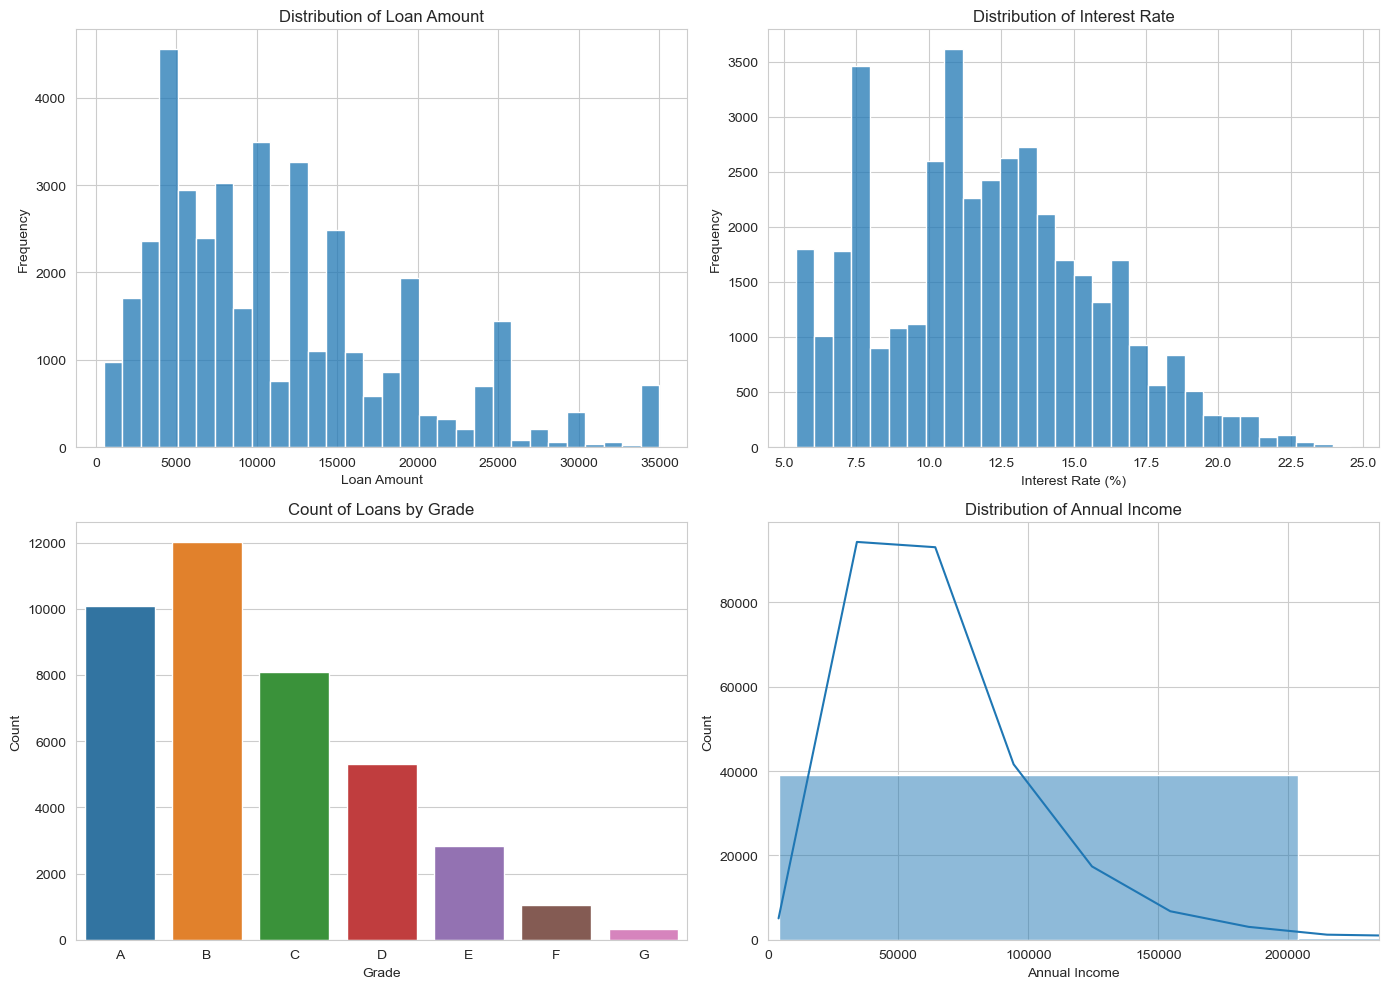

In [45]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Define the figure and axes for subplots
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Test Case 1:- Plot distribution of loan amount
sns.histplot(loan_data_cleaned['loan_amnt'], bins=30, kde=False, ax=ax[0, 0])
ax[0, 0].set_title('Distribution of Loan Amount')
ax[0, 0].set_xlabel('Loan Amount')
ax[0, 0].set_ylabel('Frequency')

# Test Case 2:- Plot distribution of interest rate
sns.histplot(loan_data_cleaned['int_rate'], bins=30, kde=False, ax=ax[0, 1])
ax[0, 1].set_title('Distribution of Interest Rate')
ax[0, 1].set_xlabel('Interest Rate (%)')
ax[0, 1].set_ylabel('Frequency')

# Test Case 3:- Count plot for loan grades
sns.countplot(x='grade', data=loan_data_cleaned, order=sorted(loan_data_cleaned['grade'].unique()), ax=ax[1, 0])
ax[1, 0].set_title('Count of Loans by Grade')
ax[1, 0].set_xlabel('Grade')
ax[1, 0].set_ylabel('Count')

# Test Case 4: Plot the Histogram for Annual Income on ax[1, 1]
sns.histplot(loan_data_cleaned['annual_inc'], bins=30, kde=True, ax=ax[1, 1])
ax[1, 1].set_title('Distribution of Annual Income')
ax[1, 1].set_xlabel('Annual Income')
ax[1, 1].set_ylabel('Count')
ax[1, 1].set_xlim(0, loan_data['annual_inc'].quantile(0.99))

plt.tight_layout()
plt.show()

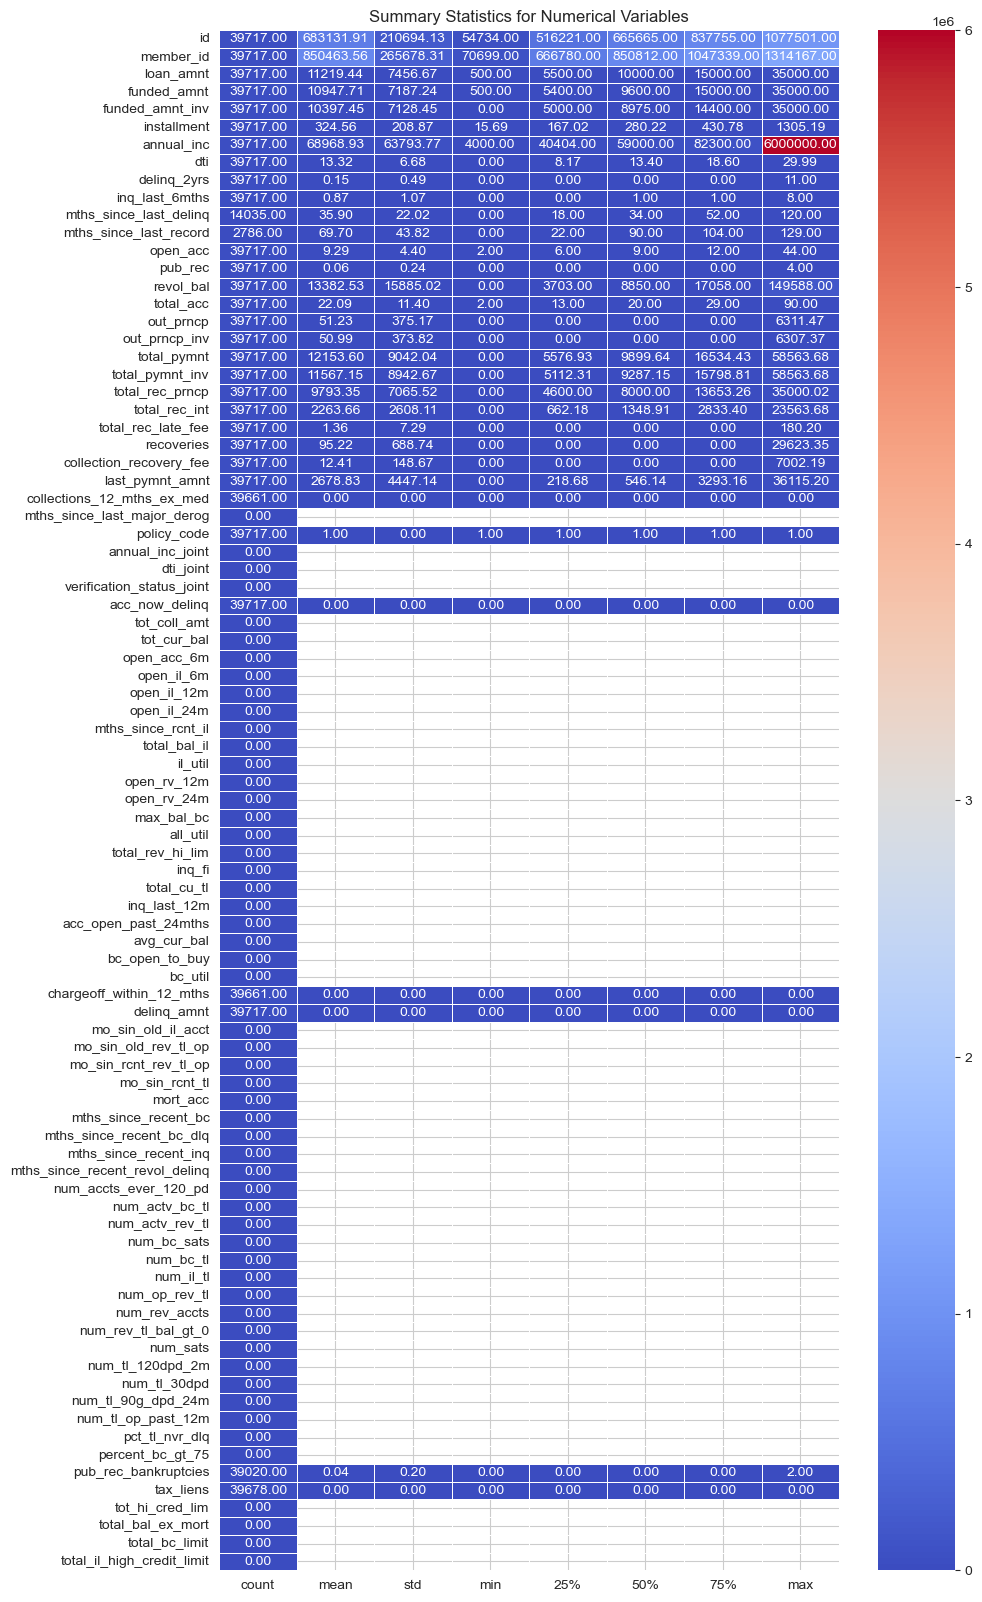

In [46]:
# Test Case 5:- Summary Statistics for Numerical Variables
fig, ax = plt.subplots(figsize=(10, 20))
sns.heatmap(loan_data.describe().T, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=ax)
ax.set_title('Summary Statistics for Numerical Variables')
plt.show()

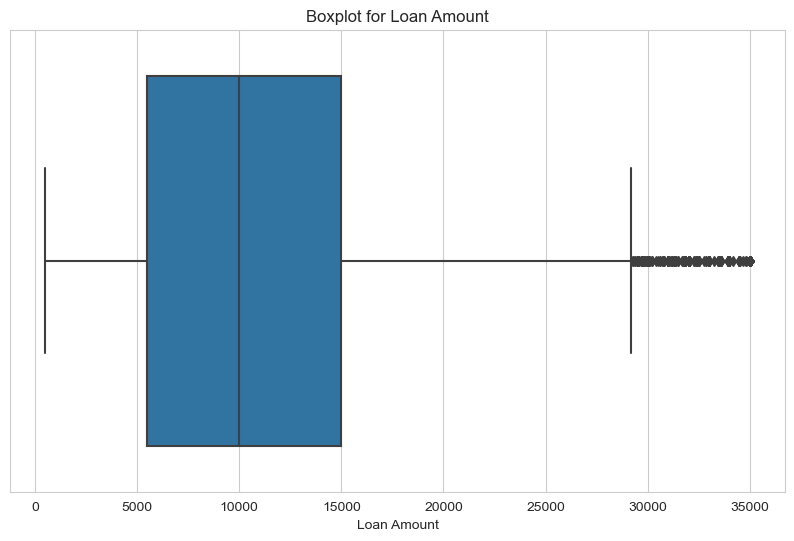

In [47]:
# Test Case 6: Boxplot for outlier detection in loan amount
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='loan_amnt', data=loan_data_cleaned, ax=ax)
ax.set_title('Boxplot for Loan Amount')
ax.set_xlabel('Loan Amount')
plt.show()

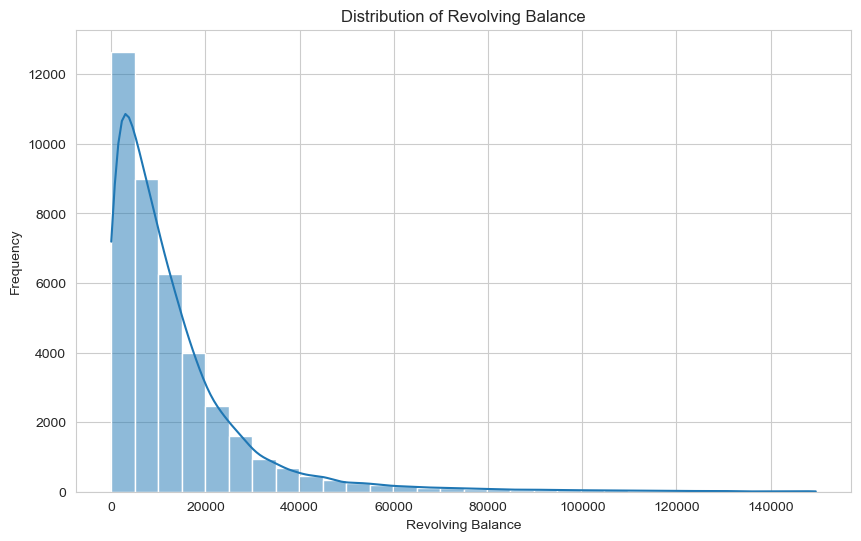

In [64]:
# Test Case 7: Histogram of Revolving Balance
plt.figure(figsize=(10, 6))
sns.histplot(loan_data_cleaned['revol_bal'], bins=30, kde=True)
plt.title('Distribution of Revolving Balance')
plt.xlabel('Revolving Balance')
plt.ylabel('Frequency')
plt.show()

### Observations from Univariate Analysis:

1.)Loan Amount Distribution:
Most loans are concentrated in lower amounts, suggesting that smaller loans are more common among borrowers.

2.)Interest Rate Distribution:
The interest rates are mostly clustered between 10% and 15%. This range might be indicative of the typical risk associated with the majority of loans.

3.)Loan Grades:
Loans are categorized across different grades (A to G). The count of loans decreases as the grade worsens, which likely reflects both the risk assessment of borrowers and the demand for loans across these risk categories.

4.)Loan Status:
The majority of loans are either 'Fully Paid' or 'Current', indicating a healthy loan book. The 'Charged-off' status, which denotes defaults, is significantly less frequent but still noteworthy for risk assessment.

## Bivariate Analysis

1.)Relationship between Loan Amount and Loan Status.
2.)Impact of Interest Rate on Loan Status.
3.)Influence of Loan Grade on Default Rates.

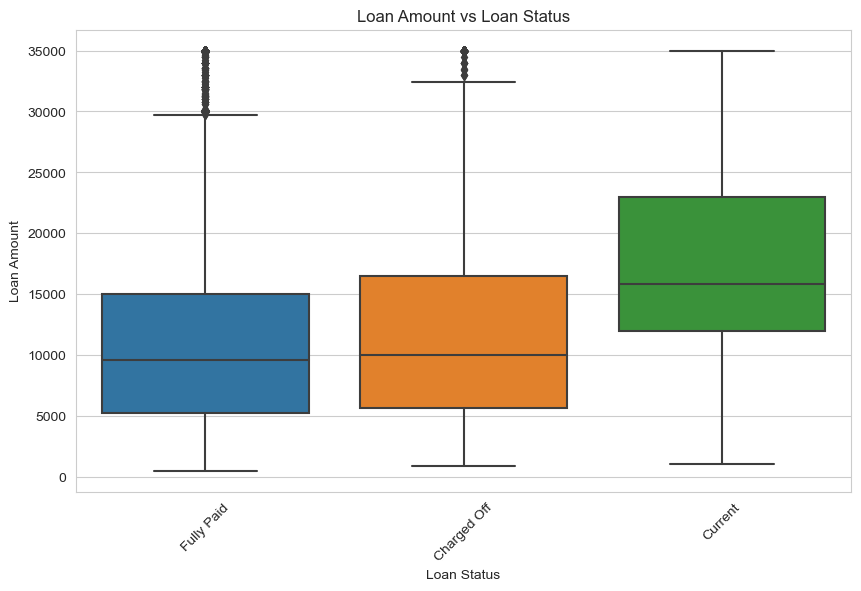

In [48]:
# Set the aesthetic style of the plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=loan_data)
plt.title('Loan Amount vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)
plt.show()

### Observations For Test Case 1:

Test Case 1:-
Fully Paid Loans: The median loan amount for fully paid loans is lower compared to charged-off loans.
Charged-Off Loans: Charged-off loans tend to have higher loan amounts, indicating that higher loan amounts may be associated with a higher risk of default.
Current Loans: The distribution of loan amounts for current loans is similar to fully paid loans, suggesting ongoing loans have a similar risk profile to fully paid loans.

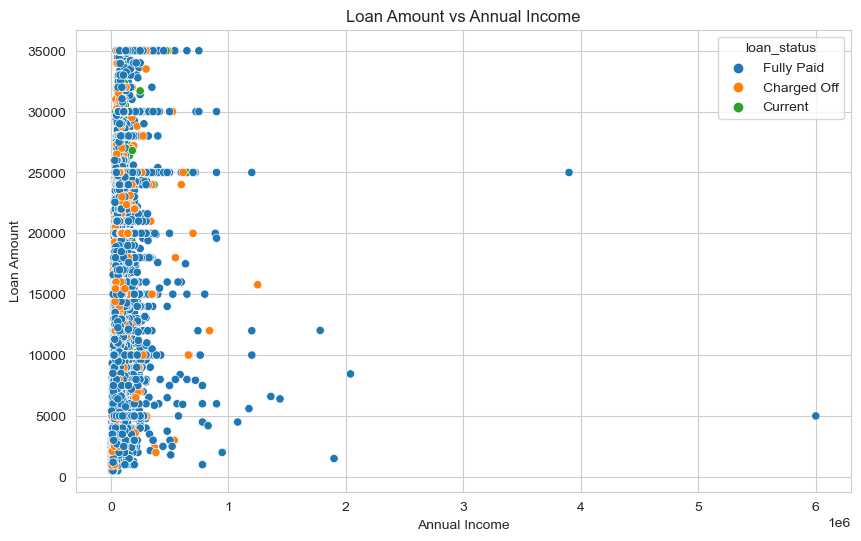

In [50]:
#Test Case 2:- Scatter Plot for Loan Amount vs. Annual Income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_inc', y='loan_amnt', hue='loan_status', data=loan_data_cleaned)
plt.title('Loan Amount vs Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.show()

### Observatiosn for Test case 2:-

In [ ]:
Higher Income Borrowers: Borrowers with higher annual incomes tend to take larger loans.
Loan Status: There is no clear separation of loan status based on annual income alone, but larger loans tend to have a higher risk of being charged-off.
Outliers: There are significant outliers with extremely high incomes and loan amounts, which should be investigated further.

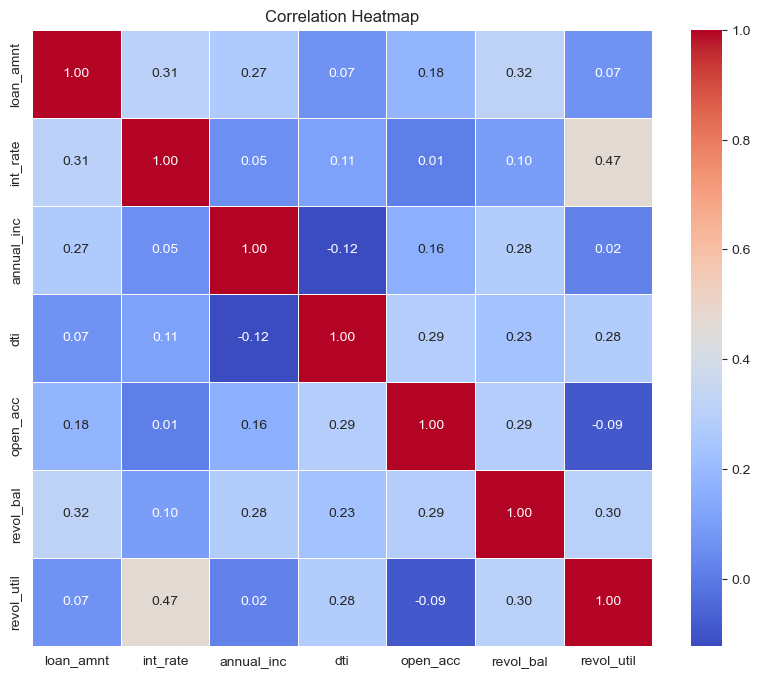

In [51]:
#Test Case 3:- Correlation Analysis for Numerical Variables
corr_vars = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'open_acc', 'revol_bal', 'revol_util']
corr_matrix = loan_data_cleaned[corr_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Observatiosn for Test case 3:-

In [ ]:
Loan Amount and Annual Income: There is a moderate positive correlation (around 0.3), indicating that higher income borrowers tend to take larger loans.
Loan Amount and Interest Rate: A weak negative correlation suggests that higher loan amounts might be associated with slightly lower interest rates.
Debt-to-Income Ratio (DTI) and Interest Rate: There is a weak positive correlation, implying that higher DTI ratios are associated with higher interest rates.
Revolving Utilization and Interest Rate: A moderate positive correlation indicates that higher revolving utilization rates are associated with higher interest rates.

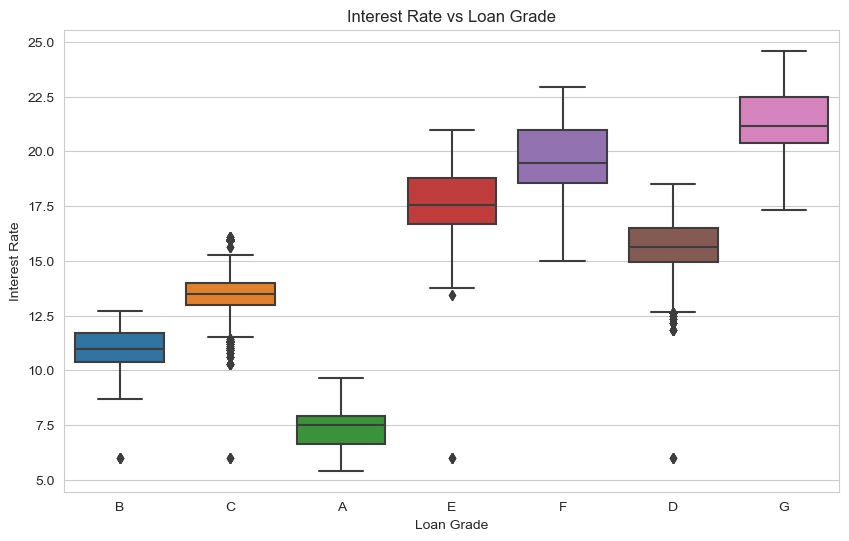

In [52]:
#Test Case 4:- Box Plot for Interest Rate vs. Loan Grade
plt.figure(figsize=(10, 6))
sns.boxplot(x='grade', y='int_rate', data=loan_data_cleaned)
plt.title('Interest Rate vs Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Interest Rate')
plt.show()

### Observations For test Case 4:-

In [ ]:
Loan Grades: Lower grades (e.g., D, E, F) are associated with higher interest rates, while higher grades (A, B) have lower interest rates.
Interest Rate Spread: There is a noticeable spread within each grade, suggesting that other factors also influence the interest rate beyond the loan grade.

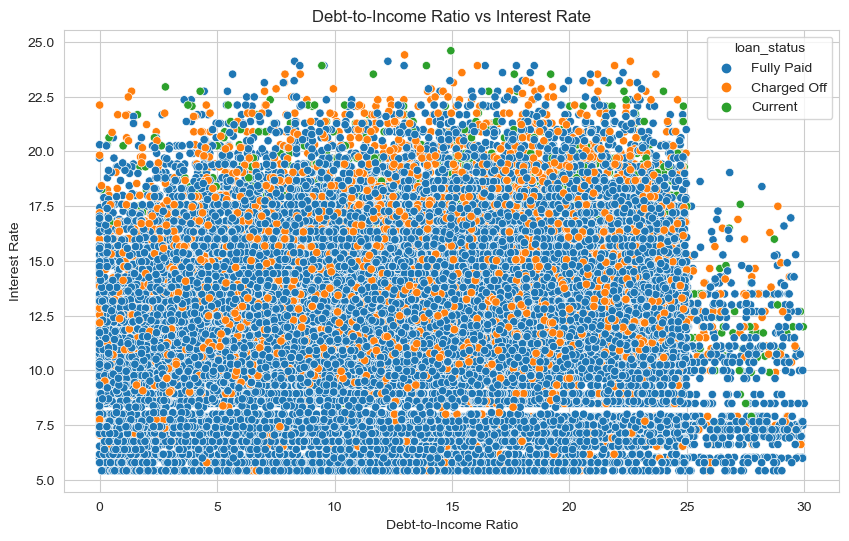

In [53]:
# Test Case 5: Scatter Plot for Debt-to-Income Ratio vs. Interest Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='dti', y='int_rate', hue='loan_status', data=loan_data_cleaned)
plt.title('Debt-to-Income Ratio vs Interest Rate')
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Interest Rate')
plt.show()

### Observations for Test Case 5:- 

In [ ]:
Higher DTI Ratios: Borrowers with higher DTI ratios tend to have higher interest rates, indicating higher perceived risk.
Loan Status: Charged-off loans are more prevalent at higher DTI ratios and interest rates, suggesting a combined risk factor.

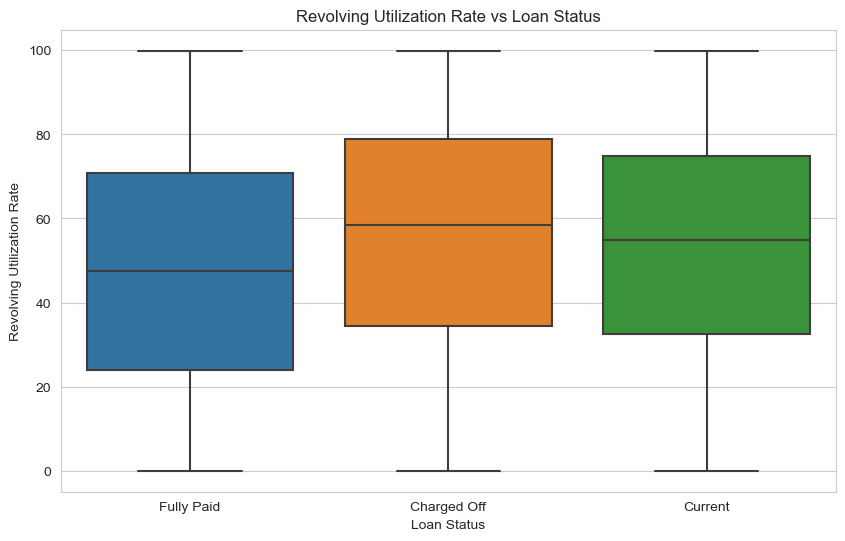

In [54]:
# Test Case 6: Box Plot for Revolving Utilization Rate vs. Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='revol_util', data=loan_data_cleaned)
plt.title('Revolving Utilization Rate vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Revolving Utilization Rate')
plt.show()

### Observations For Test Case 6:- 

In [ ]:
Charged-Off Loans: Charged-off loans have higher median revolving utilization rates compared to fully paid and current loans.
Fully Paid Loans: Fully paid loans tend to have lower revolving utilization rates, indicating better credit utilization management.

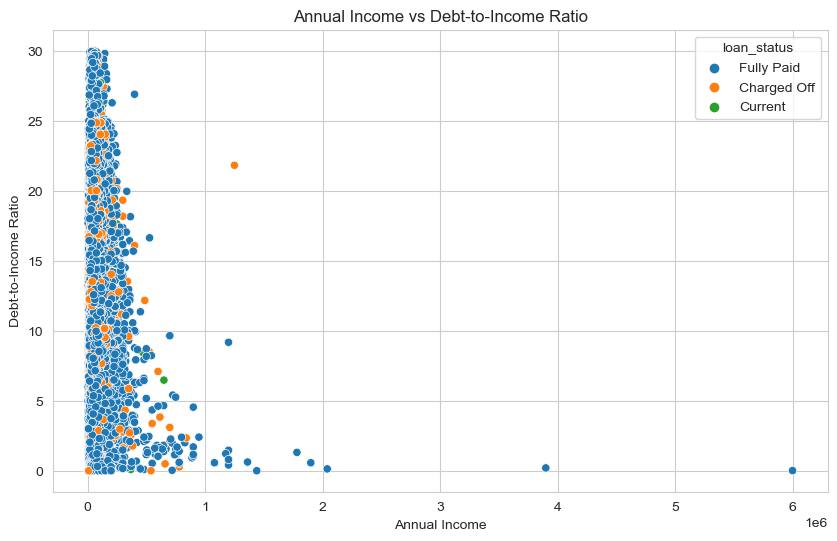

In [55]:
# Test Case 7: Scatter Plot for Annual Income vs. Debt-to-Income Ratio
plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_inc', y='dti', hue='loan_status', data=loan_data_cleaned)
plt.title('Annual Income vs Debt-to-Income Ratio')
plt.xlabel('Annual Income')
plt.ylabel('Debt-to-Income Ratio')
plt.show()

### Observations For Test Case 7:- 

In [ ]:
Income Levels: Higher annual incomes are associated with lower DTI ratios, indicating that higher income borrowers manage their debts better relative to their income.
Loan Status: Charged-off loans are more frequent among borrowers with higher DTI ratios, regardless of income, highlighting the importance of DTI as a risk indicator.

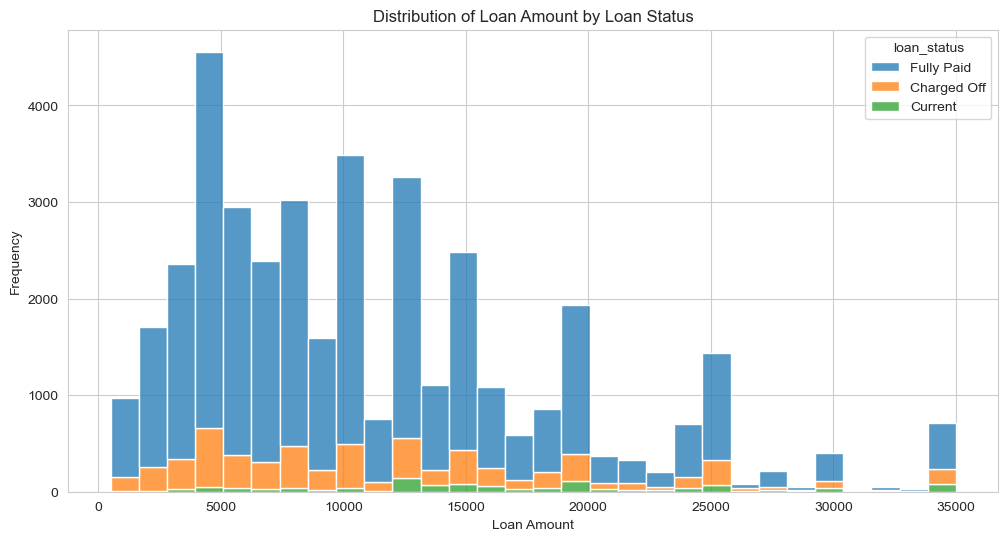

In [56]:
# Test Case 8: Distribution of Loan Amount by Loan Status
plt.figure(figsize=(12, 6))
sns.histplot(data=loan_data_cleaned, x='loan_amnt', hue='loan_status', multiple='stack', bins=30)
plt.title('Distribution of Loan Amount by Loan Status')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

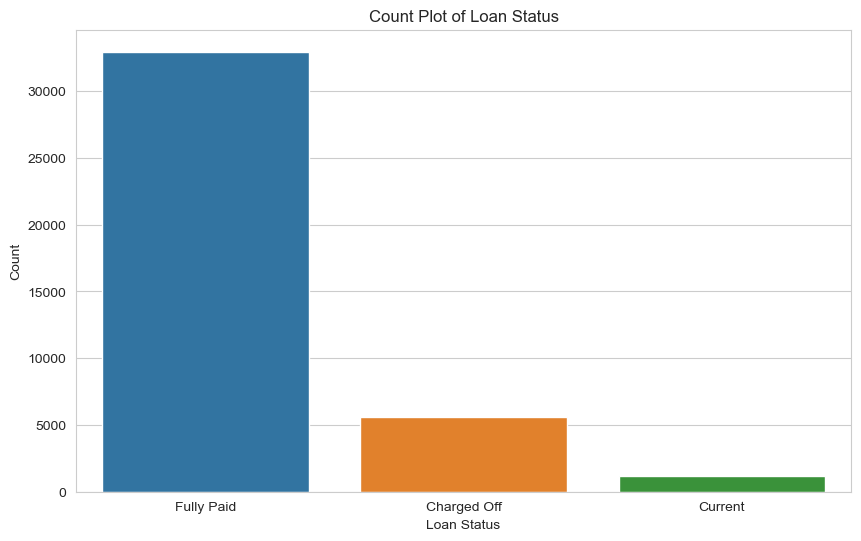

In [57]:
 # Test Case 9: Count Plot of Loan Status
plt.figure(figsize=(10, 6))
sns.countplot(data=loan_data_cleaned, x='loan_status')
plt.title('Count Plot of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()    

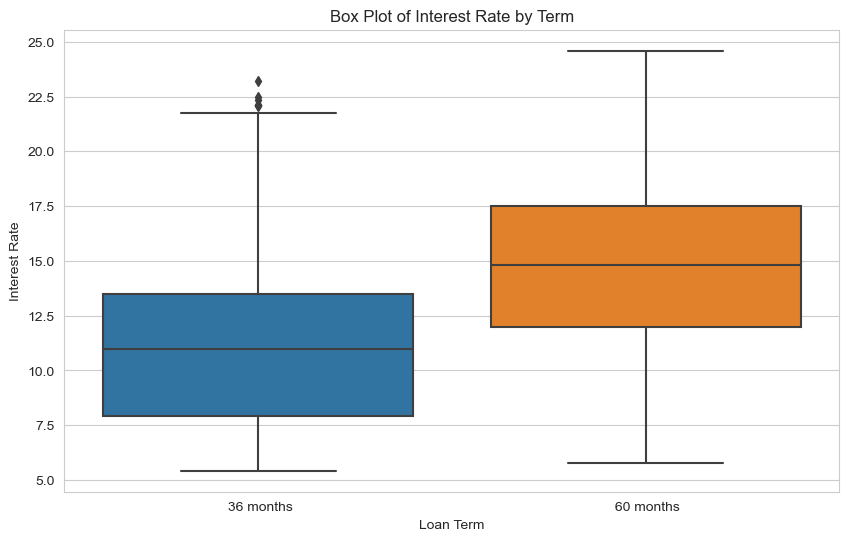

In [58]:
# Test Case 10: Box Plot of Interest Rate by Term
plt.figure(figsize=(10, 6))
sns.boxplot(data=loan_data_cleaned, x='term', y='int_rate')
plt.title('Box Plot of Interest Rate by Term')
plt.xlabel('Loan Term')
plt.ylabel('Interest Rate')
plt.show()

C:\Users\nikgupta4\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\nikgupta4\AppData\Local\Temp\ipykernel_22388\2039044420.py:7: UserWarning: The figure layout has changed to tight
  pairplot.fig.tight_layout()


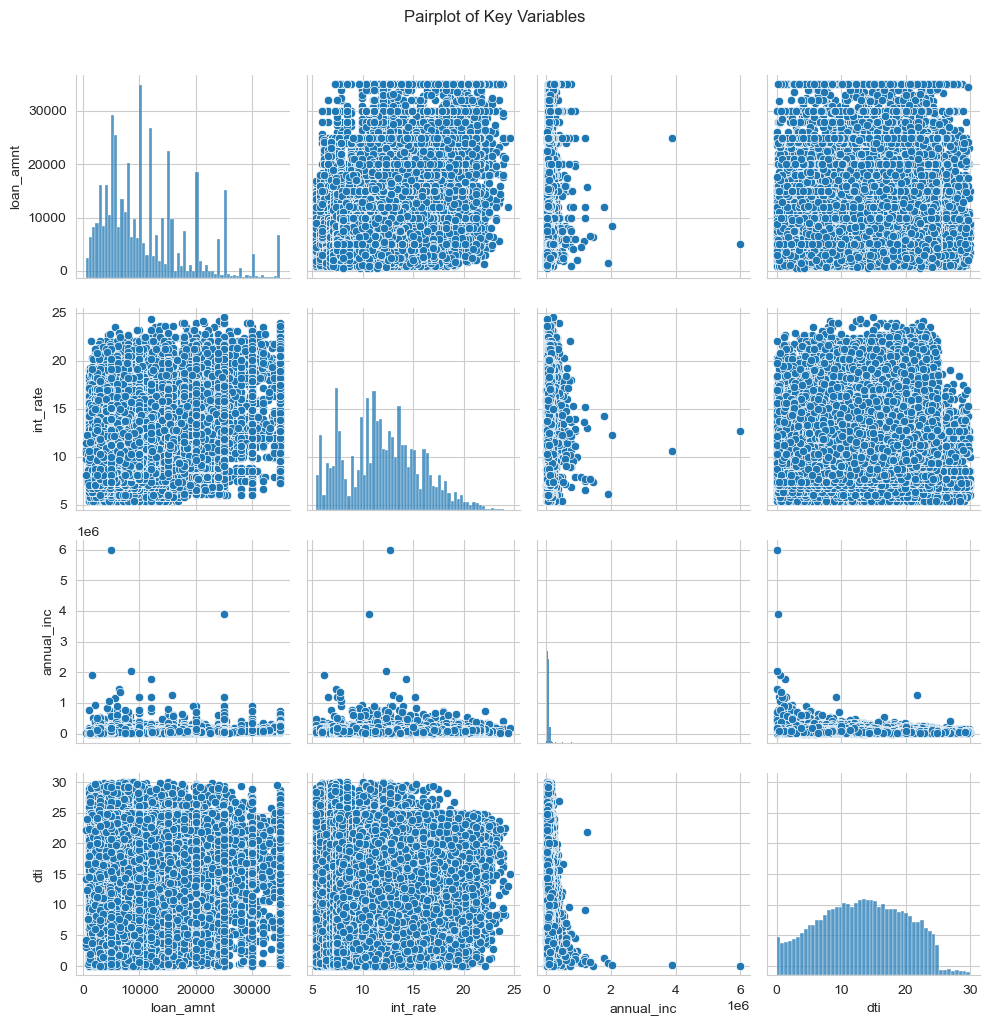

In [62]:
# Test Case 11: Pairplot of Key Variables
key_vars = ['loan_amnt', 'int_rate', 'annual_inc', 'dti']
pairplot = sns.pairplot(loan_data_cleaned[key_vars])

# Adjust the layout and add the title
pairplot.fig.suptitle('Pairplot of Key Variables', y=1.02)
pairplot.fig.tight_layout()

plt.show()

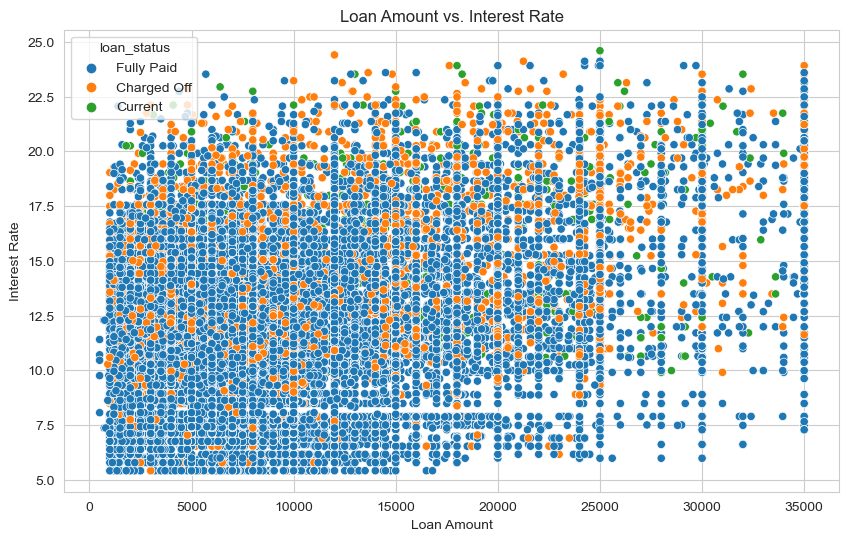

In [66]:
# Test Case 12: Scatter Plot of Loan Amount vs. Interest Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(data=loan_data_cleaned, x='loan_amnt', y='int_rate', hue='loan_status')
plt.title('Loan Amount vs. Interest Rate')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.show()

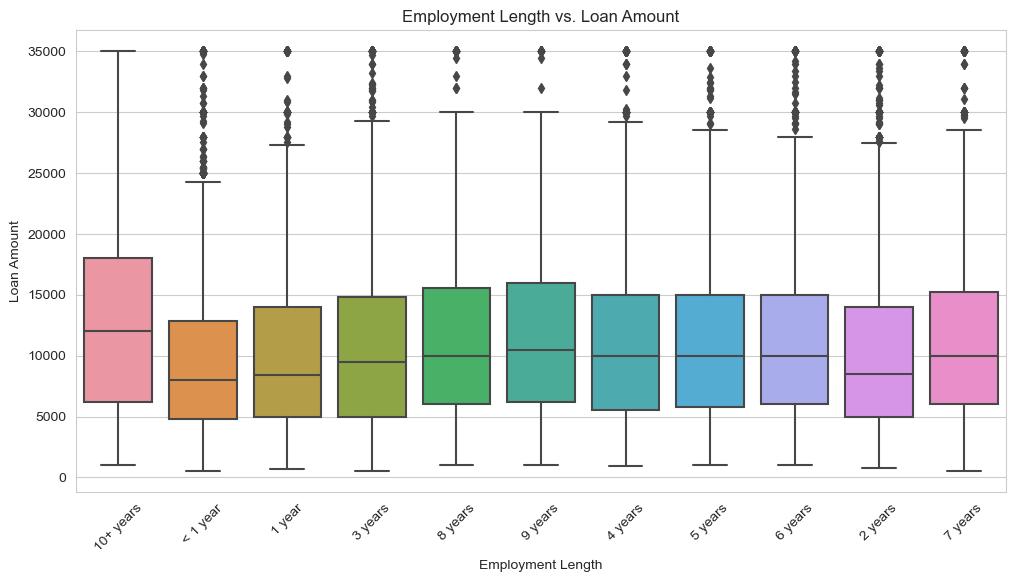

In [67]:
# Test Case 13: Box Plot of Employment length vs. Loan Amount
plt.figure(figsize=(12, 6))
sns.boxplot(data=loan_data_cleaned, x='emp_length', y='loan_amnt')
plt.title('Employment Length vs. Loan Amount')
plt.xlabel('Employment Length')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)
plt.show()

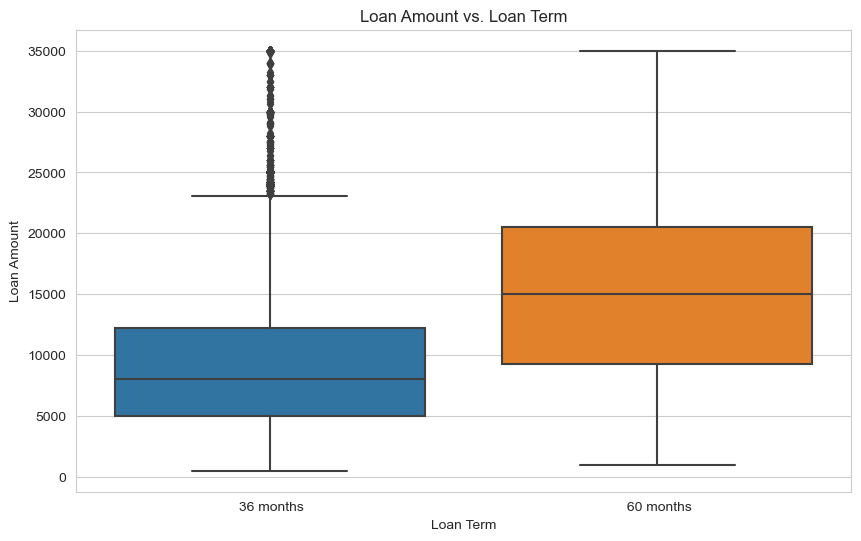

In [68]:
# Test Case 14: Box Plot of Loan term vs. Loan Amount
plt.figure(figsize=(10, 6))
sns.boxplot(data=loan_data_cleaned, x='term', y='loan_amnt')
plt.title('Loan Amount vs. Loan Term')
plt.xlabel('Loan Term')
plt.ylabel('Loan Amount')
plt.show()

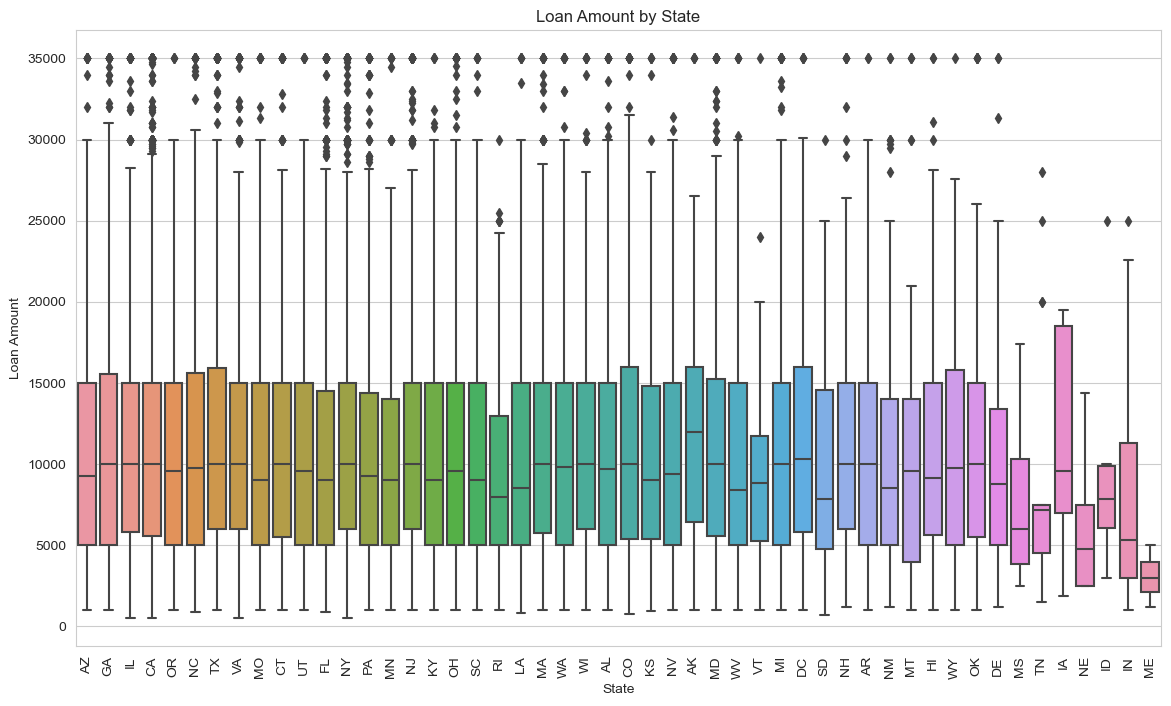

In [69]:
# Test Case 15: Box Plot of State vs. Loan Amount
plt.figure(figsize=(14, 8))
sns.boxplot(data=loan_data_cleaned, x='addr_state', y='loan_amnt')
plt.title('Loan Amount by State')
plt.xlabel('State')
plt.ylabel('Loan Amount')
plt.xticks(rotation=90)
plt.show()

## Segmented Analysis  

Loan Purpose: Analyze how the purpose of the loan influences default rates.
Home Ownership: Explore the relationship between the borrower's home ownership status and loan default rates.
Annual Income: Investigate how varying income levels correlate with the likelihood of default.

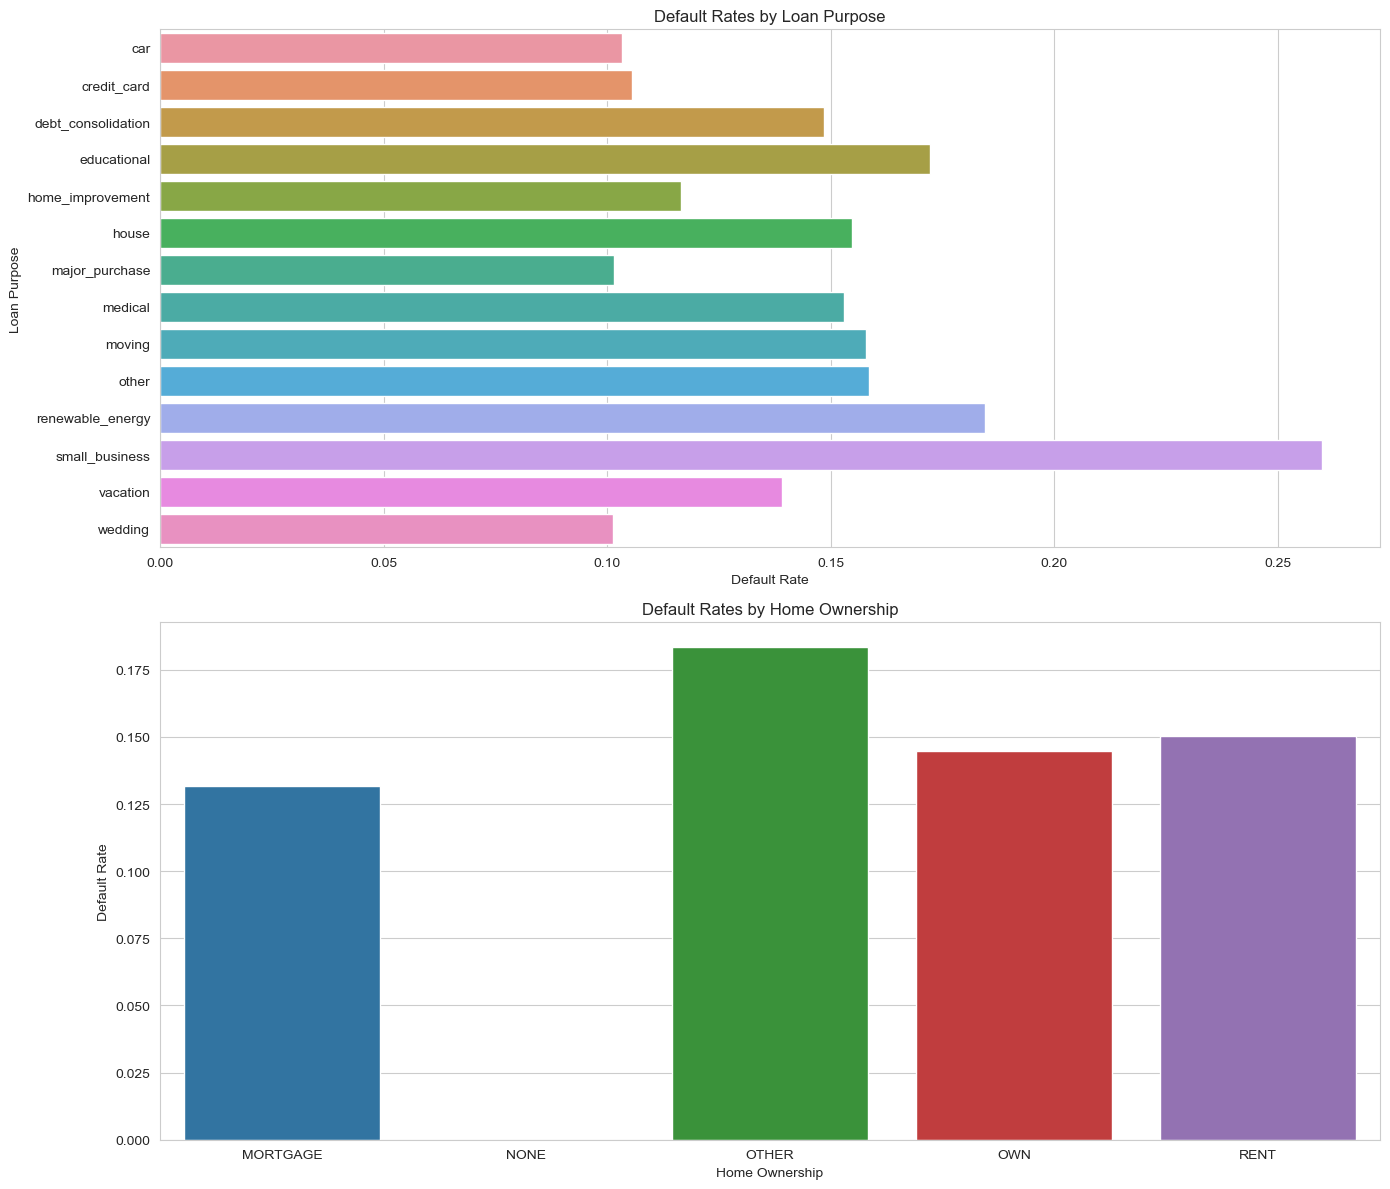

In [122]:
loan_data_cleaned = loan_data.dropna(subset=['loan_status', 'purpose', 'home_ownership'])

# Define the figure and axes for subplots
fig, ax = plt.subplots(2, 1, figsize=(14, 12))

# Calculate default rates by loan purpose
default_rates_by_purpose = loan_data_cleaned[loan_data_cleaned['loan_status'] == 'Charged Off'].groupby('purpose').size() / loan_data_cleaned.groupby('purpose').size()

# Verify the calculated default rates by loan purpose
#print("Default Rates by Loan Purpose:")
#print(default_rates_by_purpose)

# Plot default rates by loan purpose
sns.barplot(x=default_rates_by_purpose.values, y=default_rates_by_purpose.index, ax=ax[0])
ax[0].set_title('Default Rates by Loan Purpose')
ax[0].set_xlabel('Default Rate')
ax[0].set_ylabel('Loan Purpose')

# Calculate default rates by home ownership
default_rates_by_home_ownership = loan_data_cleaned[loan_data_cleaned['loan_status'] == 'Charged Off'].groupby('home_ownership').size() / loan_data_cleaned.groupby('home_ownership').size()

# Verify the calculated default rates by home ownership
#print("Default Rates by Home Ownership:")
#print(default_rates_by_home_ownership)

# Plot default rates by home ownership
sns.barplot(x=default_rates_by_home_ownership.index, y=default_rates_by_home_ownership.values, ax=ax[1])
ax[1].set_title('Default Rates by Home Ownership')
ax[1].set_xlabel('Home Ownership')
ax[1].set_ylabel('Default Rate')

plt.tight_layout()
plt.show()

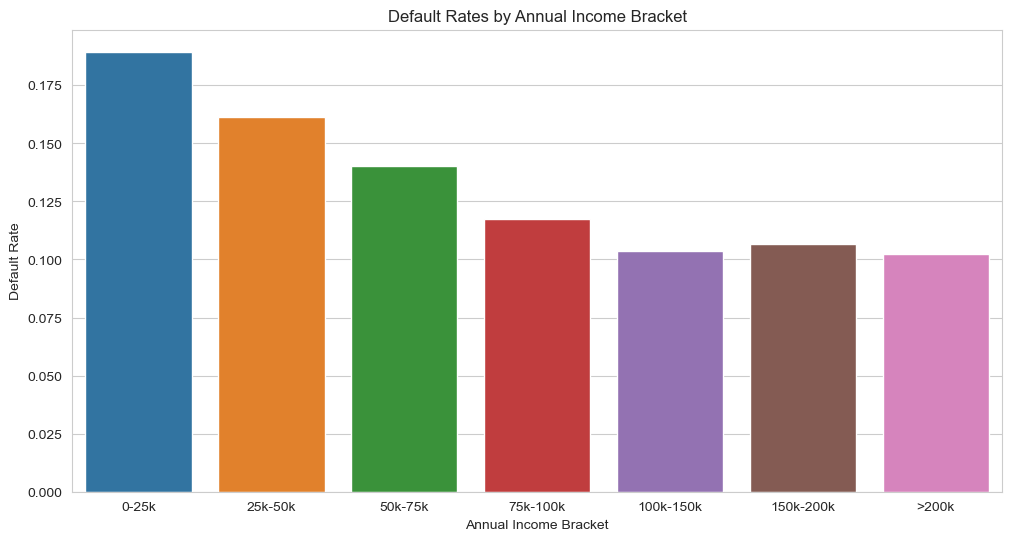

In [123]:
loan_data_cleaned['loan_status'] = loan_data_cleaned['loan_status'].str.strip()

# Categorize annual income into brackets for analysis
income_bins = [0, 25000, 50000, 75000, 100000, 150000, 200000, float('inf')]
income_labels = ['0-25k', '25k-50k', '50k-75k', '75k-100k', '100k-150k', '150k-200k', '>200k']
loan_data_cleaned['income_bracket'] = pd.cut(loan_data_cleaned['annual_inc'], bins=income_bins, labels=income_labels)

# Verify the categorization
#print("Income Brackets:")
#print(loan_data_cleaned[['annual_inc', 'income_bracket']].head())

# Calculate default rates by income brackets
default_rates_by_income = loan_data_cleaned[loan_data_cleaned['loan_status'] == 'Charged Off'].groupby('income_bracket').size() / loan_data_cleaned.groupby('income_bracket').size()

# Verify the calculated default rates
#print("Default Rates by Income Bracket:")
#print(default_rates_by_income)

# Plot default rates by income brackets
plt.figure(figsize=(12, 6))
sns.barplot(x=default_rates_by_income.index, y=default_rates_by_income.values)
plt.title('Default Rates by Annual Income Bracket')
plt.xlabel('Annual Income Bracket')
plt.ylabel('Default Rate')
plt.show()

### Derived Columns 

In [71]:
loan_data_cleaned['loan_to_income_ratio'] = loan_data_cleaned['loan_amnt'] / loan_data_cleaned['annual_inc']
loan_data_cleaned['int_rate_category'] = pd.cut(loan_data_cleaned['int_rate'], 
                                                 bins=[0, 10, 15, 20, 100], 
                                                 labels=['Low', 'Medium', 'High', 'Very High'])

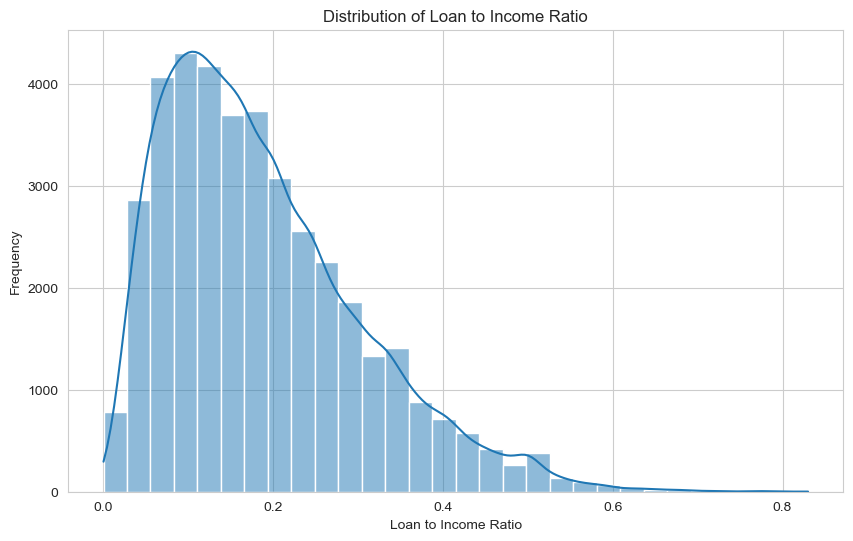

In [72]:
#Test Case 1:- Loan to Income Ratio
plt.figure(figsize=(10, 6))
sns.histplot(loan_data_cleaned['loan_to_income_ratio'], bins=30, kde=True)
plt.title('Distribution of Loan to Income Ratio')
plt.xlabel('Loan to Income Ratio')
plt.ylabel('Frequency')
plt.show()

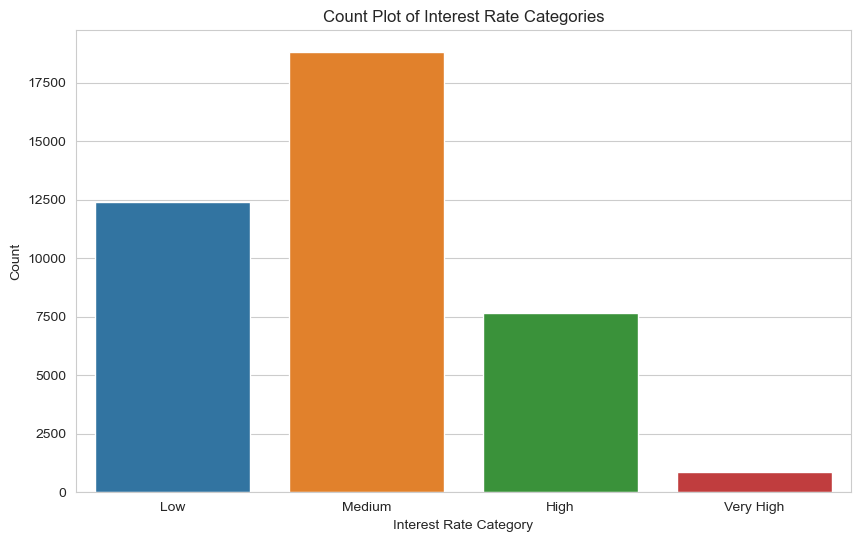

In [73]:
#Test Case 2:- Count Plot of Interest Rate Categories
plt.figure(figsize=(10, 6))
sns.countplot(data=loan_data_cleaned, x='int_rate_category')
plt.title('Count Plot of Interest Rate Categories')
plt.xlabel('Interest Rate Category')
plt.ylabel('Count')
plt.show()

In [75]:
loan_data_cleaned['dti_category'] = pd.cut(loan_data_cleaned['dti'], 
                                           bins=[0, 10, 20, 30, 100], 
                                           labels=['Low', 'Medium', 'High', 'Very High'])

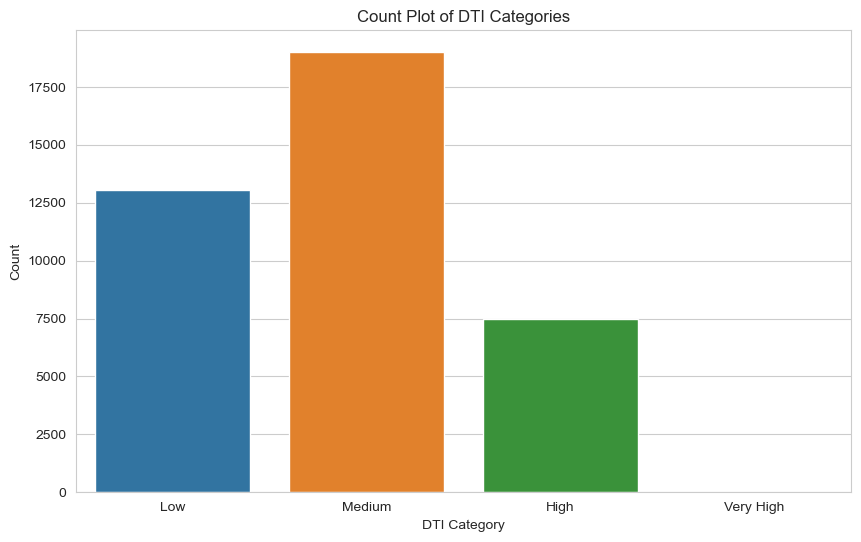

In [76]:
# Test Case 3: Distribution of DTI Categories
plt.figure(figsize=(10, 6))
sns.countplot(data=loan_data_cleaned, x='dti_category')
plt.title('Count Plot of DTI Categories')
plt.xlabel('DTI Category')
plt.ylabel('Count')
plt.show()

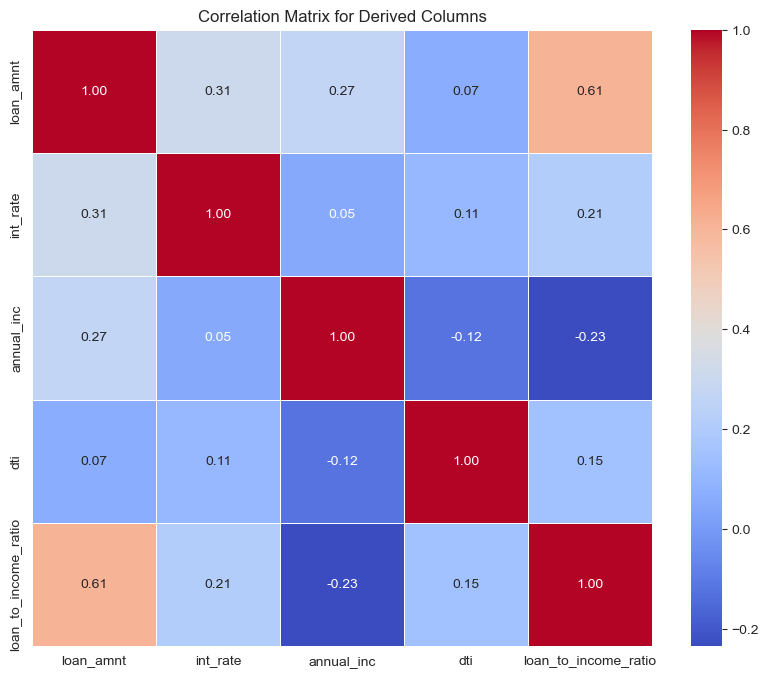

In [77]:
# Test Case 4: Correlation Matrix for Derived Columns
derived_corr_vars = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'loan_to_income_ratio']
derived_corr_matrix = loan_data_cleaned[derived_corr_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(derived_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for Derived Columns')
plt.show()

## Other Steps in EDA

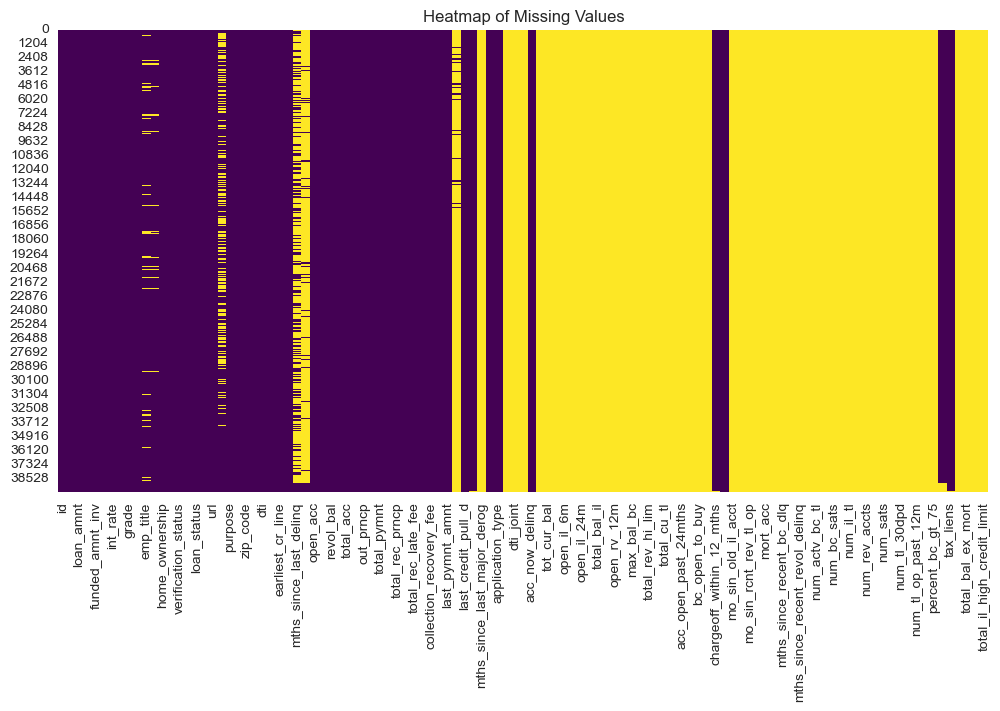

In [124]:
# Handling Missing Values
# Test Case 1: Heatmap of Missing Values
plt.figure(figsize=(12, 6))
sns.heatmap(loan_data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()